# Université Paul Sabatier
**Etudiant : BERQUEZ Léa** 

EMIND1G1 - Fondements de la recherche d'information

**TP 5**

Enseignant : José G. Moreno

2020

## TP 5. Évaluation d’un système de recherche d'information

L'évaluation est une étape complexe dans la recherche d'information. Une des conférences qui a  largement aidé à l'avancement en cette matière est la conférence TREC (http://trec.nist.gov/). Dans ce TP nous nous intéressons à l'utilisation d'une des ces outils pour l'évaluation des moteurs des recherche. 

Pour l'évaluation nous avons besoin d'un fichier qui contient la « vérité de terrain » ou « gold standard » qui est normalement appelé qrel. Ce fichier contient pour chaque requête les identifiants des documents pertinents et non-pertinents. Également, il est nécessaire d'avoir des fichiers des résultats du moteur de recherche à évaluer.

Dans ce TP, nous allons utiliser un seul fichier qrel et plusieurs fichiers des résultats (chaque fichier des résultats sera évalué).

En continuation avec le TP3, considérez la phrase « Thomas and Mario are strikers playing in Munich ». Elle sera transforme en 3 requêtes  « Thomas », « Mario » et « Munich ». Chaque requête aura de documents considérés comme correctes (relevants) et incorrectes (no relevants).  La recherche de documents sera faite par votre système de recherche d’information. Cependant, la fait de dire qu’un document est relevant est une étape manuelle. Nous allons considérer les documents suivants comme relevants pour chaque requête :

> **Thomas** and **Mario** are strikers playing in **Munich**
>
>Thomas <br>
>* http://simple.wikipedia.org/wiki/Thomas_Müller
>
>
>Mario <br>
>* http://simple.wikipedia.org/wiki/Mario_Gómez <br>
>* http://simple.wikipedia.org/wiki/Mario_Götze
>
>
>Munich <br>
>* http://simple.wikipedia.org/wiki/FC_Bayern_Munich

Maintenant, il suffit d’utiliser vos résultats de chaque requête dans le format TREC pour les évaluer.

Voici le fichier qrel pour les 3 requêtes précédentes :

```
101 0 Thomas_Müller 1
101 0 Thomas_Edison 0
101 0 Thomas_the_Apostle 0
102 0 Mario_Gómez 1
102 0 Mario_Götze 1
103 0 FC_Bayern_Munich 1
```


Notez que la première colonne est l’identifiant de la requête (nous avons trois valeurs différents, une pour chaque requête), suivi de zéro (0), suivi de l’identifiant du document annoté (le titre de la page Wikipédia) et une valeur pour dire si le document est relevant (1) ou non (0). Notez aussi que les qrels contient des documents pertinents et des documents non-pertinents.

Puis il faut créer le fichier des résultats avec la sortie de votre programme fait pendant les Tps précédents. Considérez le fichier suivant comme le résultat d’un système :

```
101	Q0	Thomas_Edison	1	  5.5	STANDARD
101	Q0	Thomas_Müller	2	  4.4	STANDARD
101	Q0	Thomas_the_Apostle	3	  3.3	STANDARD
101	Q0	Isiah_Thomas	4	  2.2	STANDARD
101	Q0	Thomas_Aquinas	5	  1.1	STANDARD
102	Q0	Mario	1	  5.5	STANDARD
102	Q0	Super_Mario	2	  4.4	STANDARD
102	Q0	Super_Mario_Bros.	3	  3.3	STANDARD
102	Q0	Super_Mario_Bros._2	4	  2.2	STANDARD
102	Q0	Mario_(series)	5	  1.1	STANDARD
102	Q0	Super_Mario_World	6	  1.0	STANDARD
102	Q0	Super_Mario_Bros._3	7	  0.9	STANDARD
102	Q0	New_Super_Mario_Bros.	8	  0.8	STANDARD
102	Q0	Mario_Gómez	9	  0.7	STANDARD
102	Q0	Mario_Party_4	10	  0.6	STANDARD
103	Q0	Munich	1	  5.5	STANDARD
103	Q0	FC_Bayern_Munich	2	  4.4	STANDARD
103	Q0	Munich_Airport	3	  3.3	STANDARD
103	Q0	Munich_Agreement	4	  2.2	STANDARD
103	Q0	Munich_Rural_District	5	  1.1	STANDARD
```
La première colonne est l’identifiant de la requête (la même que pour le qrel), suivi de zéro (Q0), suivi de l’identifiant du document retrouvé par votre système (le titre de la page Wikipédia), suivi de la position du documents dans les résultats, suivi de la valeur de similarité donné par le modèle de point choisi et de l’identifiant du système (votre nom par exemple).

Une fois construit les fichiers qrels et résultats, nous allons utiliser le logiciel d'évaluation trec_eval pour obtenir les résultats de l'évaluation. 

Télécharge et décompretion du fichier http://trec.nist.gov/trec_eval/trec_eval.8.1.tar.gz

In [1]:
!wget http://trec.nist.gov/trec_eval/trec_eval.8.1.tar.gz
!tar -xf trec_eval.8.1.tar.gz

--2020-11-01 11:40:23--  http://trec.nist.gov/trec_eval/trec_eval.8.1.tar.gz
Resolving trec.nist.gov (trec.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to trec.nist.gov (trec.nist.gov)|132.163.4.36|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://trec.nist.gov/trec_eval/trec_eval.8.1.tar.gz [following]
--2020-11-01 11:40:23--  https://trec.nist.gov/trec_eval/trec_eval.8.1.tar.gz
Connecting to trec.nist.gov (trec.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102218 (100K) [application/x-gzip]
Saving to: ‘trec_eval.8.1.tar.gz’

trec_eval.8.1.tar.g 100%[===================>]  99.82K  --.-KB/s    in 0.04s   

2020-11-01 11:40:23 (2.53 MB/s) - ‘trec_eval.8.1.tar.gz’ saved [102218/102218]



Compilation du projet trec_eval 

In [2]:
cd trec_eval.8.1/

/content/trec_eval.8.1


In [3]:
!make

gcc -g -I.  -Wall -DVERSIONID=\"8.1\"  -o trec_eval trec_eval.c get_qrels.c get_top.c form_trvec.c measures.c print_meas.c trvec_teval.c buf_util.c error_msgs.c trec_eval_help.c -lm
print_meas.c: In function ‘print_rel_trec_eval_list’:
print_meas.c:101:38: warning: ‘sprintf’ may write a terminating nul past the end of the destination [-Wformat-overflow=]
         (void) sprintf (q_buf, "%.20s", eval[0].qid);
                                      ^
print_meas.c:101:9: note: ‘sprintf’ output between 1 and 21 bytes into a destination of size 20
         (void) sprintf (q_buf, "%.20s", eval[0].qid);
         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
trvec_teval.c: In function ‘calc_time_measures’:
trvec_teval.c:614:24: warning: variable ‘rel_uap’ set but not used [-Wunused-but-set-variable]
     double rel_precis, rel_uap;/* relative precision, uap values */
                        ^~~~~~~
trvec_teval.c:613:12: warning: variable ‘recall’ set but not used [-Wunused-but-set-variable]
    

Création des fichier examples

In [ ]:
!printf "101 0 Thomas_Müller 1\n101 0 Thomas_Edison 0\n101 0 Thomas_the_Apostle 0\n102 0 Mario_Gómez 1\n102 0 Mario_Gtze 1\n103 0 FC_Bayern_Munich 1" > qrel.tp5.q100
!printf "101    Q0    Thomas_Edison    1      5.5    STANDARD\n101    Q0    Thomas_Müller    2      4.4    STANDARD\n101    Q0    Thomas_the_Apostle    3      3.3    STANDARD\n101    Q0    Isiah_Thomas    4      2.2    STANDARD\n101    Q0    Thomas_Aquinas    5      1.1    STANDARD\n102    Q0    Mario    1      5.5    STANDARD\n102    Q0    Super_Mario    2      4.4    STANDARD\n102    Q0    Super_Mario_Bros.    3      3.3    STANDARD\n102    Q0    Super_Mario_Bros._2    4      2.2    STANDARD\n102    Q0    Mario_(series)    5      1.1    STANDARD\n102    Q0    Super_Mario_World    6      1.0    STANDARD\n102    Q0    Super_Mario_Bros._3    7      0.9    STANDARD\n102    Q0    New_Super_Mario_Bros.    8      0.8    STANDARD\n102    Q0    Mario_Gómez    9      0.7    STANDARD\n102    Q0    Mario_Party_4    10      0.6    STANDARD\n103    Q0    Munich    1      5.5    STANDARD\n103    Q0    FC_Bayern_Munich    2      4.4    STANDARD\n103    Q0    Munich_Airport    3      3.3    STANDARD\n103    Q0    Munich_Agreement    4      2.2    STANDARD\n103    Q0    Munich_Rural_District    5      1.1    STANDARD" > results.tp5

Évaluation de l'exemple

In [ ]:
!./trec_eval qrel.tp5.q100 results.tp5

num_q          	all	3
num_ret        	all	20
num_rel        	all	4
num_rel_ret    	all	3
map            	all	0.3519
gm_ap          	all	0.2404
R-prec         	all	0.0000
bpref          	all	0.5000
recip_rank     	all	0.3704
ircl_prn.0.00  	all	0.3704
ircl_prn.0.10  	all	0.3704
ircl_prn.0.20  	all	0.3704
ircl_prn.0.30  	all	0.3704
ircl_prn.0.40  	all	0.3704
ircl_prn.0.50  	all	0.3704
ircl_prn.0.60  	all	0.3333
ircl_prn.0.70  	all	0.3333
ircl_prn.0.80  	all	0.3333
ircl_prn.0.90  	all	0.3333
ircl_prn.1.00  	all	0.3333
P5             	all	0.1333
P10            	all	0.1000
P15            	all	0.0667
P20            	all	0.0500
P30            	all	0.0333
P100           	all	0.0100
P200           	all	0.0050
P500           	all	0.0020
P1000          	all	0.0010


Chaque ligne corresponde à la moyenne d’une métrique d’évaluation pour les trois requêtes. 

###1. Requêtes

Utilisez les suivants requêtes dans votre système et générez les résultats dans le format décrit précédemment  :

```
ID:100+i
Thomas and Mario are strikers playing in Munich

ID:200+i
Leo scored two goals and assisted Puyol to ensure a 4–0 quarter-final victory over Bayern

ID:300+i
Skype software for Mac

ID:400+i
Cowboys fans petition Obama to oust Jones

ID:500+i
Kate and Henry are known for being devoted to the Anglican church
```



####2. Qrels

Utilisez le qrel ***qrels.tp5*** généré ci-dessous

In [4]:
!printf "101 0 Thomas_Müller 1\n101 0 Thomas_Edison 0\n101 0 Thomas_the_Apostle 0\n102 0 Mario_Gómez 1\n102 0 Mario_Gtze 1\n103 0 FC_Bayern_Munich 1\n201 0 Lionel_Messi 1\n202 0 Carles_Puyol 1\n203 0 FC_Bayern_Munich 1\n301 0 Skype 1\n302 0 Mac_OS 1\n401 0 Dallas_Cowboys 1\n402 0 Barack_Obama 1\n403 0 Jerry_Jones 1\n501 0 Catherine_Duchess_of_Cambridge 1\n502 0 Prince_Harry 1\n503 0 Anglicanism 1"> qrels.tp5


####3. Mise en place des différents systèmes 



*   Système simple analyse des termes sur seulement le titre (avec BM25) 
*   Système intersection de tous les termes secondaires avec les termes principaux mais aussi avec toute la phrase (avec BM25) 
*   Système intersection de tous les termes secondaires avec les termes principaux mais aussi avec toute la phrase (avec TF/IDF) 
*   Système simple avec pageRank 









Récupération des éléments des autres google collab : 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


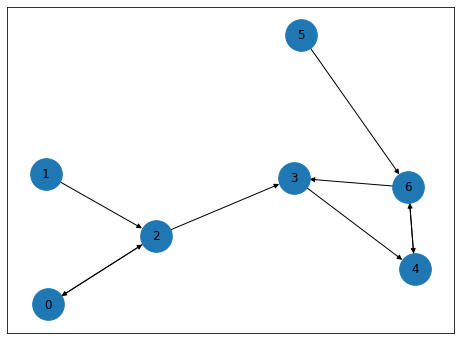

Nombre d'itérations : 419.

[(0, 0.12727557265183953), (1, 0.03616954117667246), (2, 0.12221593935467938), (3, 0.2260845242374078), (4, 0.289344118485507), (5, 0.03616954117667246), (6, 0.16274076291722134)]
--2020-11-01 11:40:52--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-page.sql.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19423642 (19M) [application/octet-stream]
Saving to: ‘simplewiki-20200901-page.sql.gz’

simplewiki-20200901 100%[===================>]  18.52M  4.76MB/s    in 3.8s    

2020-11-01 11:40:56 (4.94 MB/s) - ‘simplewiki-20200901-page.sql.gz’ saved [19423642/19423642]

--2020-11-01 11:41:00--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-pagelinks.sql.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0

100%|██████████| 1/1 [00:00<00:00,  9.80q/s]
/content/drive/My Drive/Colab Notebooks/M1FRI_Pyterrier_TP4.ipynb:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 1/1 [00:00<00:00, 199.43q/s]


1 FC_Bayern_Munich


In [6]:
%run /content/drive/"My Drive"/"Colab Notebooks"/M1FRI_Pyterrier_TP4.ipynb 

#####**Premier système sur le titre** 

Premier système qui prend en compte seulement l'index sur le titre. 
C'est un système assez simple puisque la recherche ne se fait seulement sur le titre. 

In [43]:
def systeme(query, model, head):  
  L = [] 
  termToSearch = [x for x in query.split() if x[0]==x[0].upper()]

  for term in termToSearch:
      L.append((pt.BatchRetrieve(indexrefTitre, wmodel=model, metadata=["docno","title","url"]).transform(term)[['title','score']]).head(head)) 
  return L 

#####**Deuxième système avec une simple intersection** 

Ce système réalise une recherche sur l'index du titre et sur l'index du résumé puis en fait l'intersection. 

In [44]:
def systemeSimpleIntersection(query, wmodel, head):  
  L = [] 
  termToSearch = [x for x in query.split() if x[0]==x[0].upper()]


  for term in termToSearch:
    Liste = [] 

    #print(pt.BatchRetrieve(indexref2, wmodel=model, metadata=["docno","title","url"]).transform(term)[['title','score']]) 

    res = pd.merge(pt.BatchRetrieve(indexrefResume, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title','score']], pt.BatchRetrieve(indexrefTitre, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title','score']], on = ['title']) 
    res['score'] = res['score_x'] 
    L.append(res.head(head))
  return L 

#####**Troisième système avec une intersection sur les mots principaux et secondaires** 

Ce système réalise une recherche avec les mots principaux (avec majuscules) sur l'index du titre et sur l'index du résumé puis en fait l'intersection. Puis on réalise une intersection avec les résumés sur les mots secondaires. En revanche on demande un minimum de résultats pour réaliser cette dernière intersection. On réalise aussi une intersection avec la phrase entière. 

In [45]:
def motConnexion(mot): 
  if (mot == 'and' or mot == 'or' or mot == 'in' or mot == 'are' or mot ==  'two' or mot == 'to' or mot == 'a' or mot == 'over' or mot == 'for' or mot == 'are' or mot == 'be' or mot == 'being' or mot == 'the'): 
    return False  

  return True 



def systemeIntersection(query, model, head, param):  
  L = [] 
  termToSearch = [x for x in query.split() if x[0]==x[0].upper()]

  termA = [x for x in query.split() if motConnexion(x) and x[0]!=x[0].upper()]

  liste = []
  for t in termA : 
    liste.append(pt.BatchRetrieve(indexrefResume, wmodel = model, metadata=["docno","title","url"]).transform(t)[['title','score']])  

  for term in termToSearch:
    R = pt.BatchRetrieve(indexrefResume, wmodel = model, metadata=["docno","title","url"]).transform(term)[['title','score']]

    for e in liste : 
      RP = pd.merge(R, e, on = ['title']) 

      if (len(RP) > param) : 
        R = RP 

    res = pd.merge(R, pt.BatchRetrieve(indexrefTitre, wmodel = model, metadata=["docno","title","url"]).transform(term)[['title','score']], on = ['title'])

    V = pt.BatchRetrieve(indexrefResume, wmodel="BM25", metadata=["docno","title","url"]).transform(query)['title']

    res = pd.merge(V, res, on = ['title'])

    res['score'] = res['score_x']
    L.append(res.head(head))
  return L 

#####**Quatrième système utilisant les pageRank** 

Système qui utilise les pageRank calculés pour trouver un résultat. 

In [46]:
def formaterTitre(resultat): 
  i = 0 

  for i in range(len(resultat)) : 
    titre = resultat['title'][i] 
    titre = titre[11:]
    titre = titre.replace(" ", "_")
    titre = titre.replace("'", "")
    resultat['title'][i] = titre 

  return resultat 

In [47]:
def systemePageRank(query, wmodel, head, pr):  
  L = [] 
  termToSearch = [x for x in query.split() if x[0]==x[0].upper()]

  for term in termToSearch:

    res = pd.merge(pt.BatchRetrieve(indexrefResume, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title']],     pt.BatchRetrieve(indexrefTitre, model = wmodel, metadata=["docno","title","url"]).transform(term)[['title']], how='inner', on = ['title'])

    res2 = pd.merge(dfpages, formaterTitre(res), on = ['title']) 
    res2['score'] = 0.0 


    i = 0 
    for i in range(len(res2)): 
      id = res2['Id'][i] 
      res2['score'][i] = pr[id]  * 10000000.0 
    

    L.append((res2.sort_values(['score'], ascending = False, ignore_index = True)).head(head))


  return L 

#####**Fonction pour transformer les résultats dans le bon format** 

Conversion en string pour les trois premiers systèmes 

In [21]:
def conversionString(Liste, ID): 
  id = ID + 1

  s = "" 
  i = 0 
  for i in range(len(Liste)) : 
    j = 0 

    for j in range(len(Liste[i])): 

      titre = Liste[i]['title'][j] 
      titre = titre[11:]
      titre = titre.replace(" ", "_")
      titre = titre.replace("'", "") 

      s = s + str(id) + "   " + "Q0" + "    " + str(titre) + "    " + str(j + 1) + "    " + str(Liste[i]['score'][j]) + "   " + "STANDARD\n"  
  
    id = id + 1 
  return s 
    



Conversion en string pour le système PageRank 

In [20]:
def conversionStringPR(Liste, ID): 
  id = ID + 1

  s = "" 

  i = 0 
  for i in range(len(Liste)) : 
    j = 0 

    for j in range(len(Liste[i])): 

      if (Liste[i]['title'][j] in s) : 
        s = s 
      else : 
        s = s + str(id) + "   " + "Q0" + "    " + str(Liste[i]['title'][j] ) + "    " + str(j+1) + "    " + str(Liste[i]['score'][j]) + "   " + "STANDARD\n"  
  
    id = id + 1  
  return s 
    

#####**Fonctions pour faire un tableau**

Fonction permettant de mettre tous les résultats en parralèle pour 100




In [32]:
def formatage(resultat): 
  formatFinal = [] 

  for e in resultat: 
    formatFinal.append(e[20:]) 

  return formatFinal 

def resultatsTotal(resultSysSimple, resultSysSimpleInter, resultSysInter, resultSysInterAutreModel, resultSysPageRank): 
  d = { '' : ['all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all' ], 
        'SysTitre' : formatage(resultSysSimple), 
        'SysSimpleInter' : formatage(resultSysSimpleInter), 
        'SysInter' : formatage(resultSysInter), 
        'SysInterAutreModel' : formatage(resultSysInterAutreModel), 
        'SysPageRank' : formatage(resultSysPageRank)
       }
  
  indexI = ['num_q', 'num_ret', 'num_rel', 'num_rel_ret', 'map', 'gm_ap', 'R-prec', 'bpref', 'recip_rank', 
            'ircl_prn.0.00', 'ircl_prn.0.10', 'ircl_prn.0.20', 'ircl_prn.0.30', 'ircl_prn.0.40', 'ircl_prn.0.50', 'ircl_prn.0.60', 'ircl_prn.0.70', 
            'ircl_prn.0.80', 'ircl_prn.0.90', 'ircl_prn.1.00', 'P5', 'P10', 'P15', 'P20', 'P30', 'P100', 'P200', 'P500', 'P1000']      

  tab = pd.DataFrame(data = d, index = indexI) 

  return tab 

Fonction permettant de mettre tous les résultats en parralèle pour 1000


In [33]:
def resultatsTotalMille(resultSysSimple, resultSysSimpleC, resultSysSimpleInter, resultSysSimpleInterC, resultSysInter, resultSysInterC, resultSysInterAutreModel, resultSysInterAutreModelC, resultSysPageRank, resultSysPageRankC): 
  d = { '' : ['all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all', 'all' ], 
        'SysTitre100' : formatage(resultSysSimple), 
        'SysTitre1000' : formatage(resultSysSimpleC), 
        'SysSimpleInter100' : formatage(resultSysSimpleInter), 
        'SysSimpleInter1000' : formatage(resultSysSimpleInterC), 
        'SysInter100' : formatage(resultSysInter), 
        'SysInter1000' : formatage(resultSysInterC), 
        'SysInterAutreModel100' : formatage(resultSysInterAutreModel), 
        'SysInterAutreModel1000' : formatage(resultSysInterAutreModelC), 
        'SysPageRank100' : formatage(resultSysPageRank), 
        'SysPageRank1000' : formatage(resultSysPageRankC)
       }
  
  indexI = ['num_q', 'num_ret', 'num_rel', 'num_rel_ret', 'map', 'gm_ap', 'R-prec', 'bpref', 'recip_rank', 
            'ircl_prn.0.00', 'ircl_prn.0.10', 'ircl_prn.0.20', 'ircl_prn.0.30', 'ircl_prn.0.40', 'ircl_prn.0.50', 'ircl_prn.0.60', 'ircl_prn.0.70', 
            'ircl_prn.0.80', 'ircl_prn.0.90', 'ircl_prn.1.00', 'P5', 'P10', 'P15', 'P20', 'P30', 'P100', 'P200', 'P500', 'P1000']      

  tab = pd.DataFrame(data = d, index = indexI) 

  return tab 

### 3. Analyses 


#####Programmes pour faciliter la création 

In [10]:
query = "Thomas and Mario are strikers playing in Munich" 

In [11]:
query2 = "Leo scored two goals and assisted Puyol to ensure a quarter-final victory over Bayern"

In [12]:
query3 = "Skype software for Mac"

In [13]:
query4 = "Cowboys fans petition Obama to oust Jones"

In [14]:
query5 = "Kate and Henry are known for being devoted to the Anglican church"

In [15]:
Liste = [query, query2, query3, query4, query5]

In [37]:
def evalSystemSimpl(Liste, nbTest): 
  id = 100 

  with open("systemeSimpl1.tp5", "w") as filout: 
    for e in Liste : 
      filout.write((conversionString((systeme(e, "BM25", nbTest)), id))) 
      id = id + 100 
  
  res = !./trec_eval qrels.tp5 systemeSimpl1.tp5
  return res

In [38]:
def evalSystemSInter(Liste, nbTest): 
  id = 100 
  
  with open("systemeSInter.tp5", "w") as filout:
    for e in Liste : 
      filout.write(conversionString((systemeSimpleIntersection(e, "BM25", nbTest)), id))
      id = id + 100 

  res = !./trec_eval qrels.tp5  systemeSInter.tp5
  return res 

In [50]:
def evalSystemInter(Liste, nbTest): 
  id = 100 

  with open("systemeInter.tp5", "w") as filout: 
    i = 0 
    for e in Liste: 
      if (i == 0): 
        filout.write(conversionString(systemeIntersection(e, "BM25", nbTest, 1), id)) 
      else : 
        filout.write(conversionString(systemeIntersection(e, "BM25", nbTest, 10), id)) 
      i = i + 1 
      id = id + 100 

  res = !./trec_eval qrels.tp5  systemeInter.tp5
  return res
 

In [40]:
def evalSystemInterTF(Liste, nbTest): 
  id = 100 

  with open("systemInterTF.tp5", "w") as filout: 
    i = 0 
    for e in Liste :

      if (i == 0):
        filout.write(conversionString(systemeIntersection(e, "TF_IDF", nbTest, 1), id)) 
      else : 
        filout.write(conversionString(systemeIntersection(e, "TF_IDF", nbTest, 5), id))
      id = id + 100 

  res = !./trec_eval qrels.tp5 systemInterTF.tp5
  return    res   
 

In [41]:
def evalSystemPR(Liste, nbTest): 
  id = 100 

  with open("resultsPR.tp5", "w") as filout: 
    for e in Liste : 
      filout.write(conversionStringPR(systemePageRank(e, "BM25", nbTest, pr), id))  
      id = id + 100  

  res = !./trec_eval qrels.tp5 resultsPR.tp5 
  return res

#####Pour 100 tests 

In [48]:
evalSystS = evalSystemSimpl(Liste, 100)  

In [49]:
print(evalSystS) 

['num_q          \tall\t14', 'num_ret        \tall\t589', 'num_rel        \tall\t15', 'num_rel_ret    \tall\t10', 'map            \tall\t0.3182', 'gm_ap          \tall\t0.0129', 'R-prec         \tall\t0.2143', 'bpref          \tall\t0.6786', 'recip_rank     \tall\t0.3195', 'ircl_prn.0.00  \tall\t0.3195', 'ircl_prn.0.10  \tall\t0.3195', 'ircl_prn.0.20  \tall\t0.3195', 'ircl_prn.0.30  \tall\t0.3195', 'ircl_prn.0.40  \tall\t0.3195', 'ircl_prn.0.50  \tall\t0.3195', 'ircl_prn.0.60  \tall\t0.3169', 'ircl_prn.0.70  \tall\t0.3169', 'ircl_prn.0.80  \tall\t0.3169', 'ircl_prn.0.90  \tall\t0.3169', 'ircl_prn.1.00  \tall\t0.3169', 'P5             \tall\t0.0857', 'P10            \tall\t0.0500', 'P15            \tall\t0.0381', 'P20            \tall\t0.0286', 'P30            \tall\t0.0214', 'P100           \tall\t0.0071', 'P200           \tall\t0.0036', 'P500           \tall\t0.0014', 'P1000          \tall\t0.0007']


In [26]:
evalSystS = ['num_q          \tall\t14', 'num_ret        \tall\t589', 'num_rel        \tall\t15', 'num_rel_ret    \tall\t10', 'map            \tall\t0.3182', 'gm_ap          \tall\t0.0129', 'R-prec         \tall\t0.2143', 'bpref          \tall\t0.6786', 'recip_rank     \tall\t0.3195', 'ircl_prn.0.00  \tall\t0.3195', 'ircl_prn.0.10  \tall\t0.3195', 'ircl_prn.0.20  \tall\t0.3195', 'ircl_prn.0.30  \tall\t0.3195', 'ircl_prn.0.40  \tall\t0.3195', 'ircl_prn.0.50  \tall\t0.3195', 'ircl_prn.0.60  \tall\t0.3169', 'ircl_prn.0.70  \tall\t0.3169', 'ircl_prn.0.80  \tall\t0.3169', 'ircl_prn.0.90  \tall\t0.3169', 'ircl_prn.1.00  \tall\t0.3169', 'P5             \tall\t0.0857', 'P10            \tall\t0.0500', 'P15            \tall\t0.0381', 'P20            \tall\t0.0286', 'P30            \tall\t0.0214', 'P100           \tall\t0.0071', 'P200           \tall\t0.0036', 'P500           \tall\t0.0014', 'P1000          \tall\t0.0007']

In [ ]:
evalSystSInter = evalSystemSInter(Liste, 100)  

100%|██████████| 1/1 [00:00<00:00, 132.15q/s]


In [ ]:
print(evalSystSInter)

['num_q          \tall\t13', 'num_ret        \tall\t463', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t6', 'map            \tall\t0.1872', 'gm_ap          \tall\t0.0008', 'R-prec         \tall\t0.1538', 'bpref          \tall\t0.4231', 'recip_rank     \tall\t0.1880', 'ircl_prn.0.00  \tall\t0.1880', 'ircl_prn.0.10  \tall\t0.1880', 'ircl_prn.0.20  \tall\t0.1880', 'ircl_prn.0.30  \tall\t0.1880', 'ircl_prn.0.40  \tall\t0.1880', 'ircl_prn.0.50  \tall\t0.1880', 'ircl_prn.0.60  \tall\t0.1864', 'ircl_prn.0.70  \tall\t0.1864', 'ircl_prn.0.80  \tall\t0.1864', 'ircl_prn.0.90  \tall\t0.1864', 'ircl_prn.1.00  \tall\t0.1864', 'P5             \tall\t0.0462', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0046', 'P200           \tall\t0.0023', 'P500           \tall\t0.0009', 'P1000          \tall\t0.0005']


In [27]:
evalSystSInter = ['num_q          \tall\t13', 'num_ret        \tall\t463', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t6', 'map            \tall\t0.1872', 'gm_ap          \tall\t0.0008', 'R-prec         \tall\t0.1538', 'bpref          \tall\t0.4231', 'recip_rank     \tall\t0.1880', 'ircl_prn.0.00  \tall\t0.1880', 'ircl_prn.0.10  \tall\t0.1880', 'ircl_prn.0.20  \tall\t0.1880', 'ircl_prn.0.30  \tall\t0.1880', 'ircl_prn.0.40  \tall\t0.1880', 'ircl_prn.0.50  \tall\t0.1880', 'ircl_prn.0.60  \tall\t0.1864', 'ircl_prn.0.70  \tall\t0.1864', 'ircl_prn.0.80  \tall\t0.1864', 'ircl_prn.0.90  \tall\t0.1864', 'ircl_prn.1.00  \tall\t0.1864', 'P5             \tall\t0.0462', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0046', 'P200           \tall\t0.0023', 'P500           \tall\t0.0009', 'P1000          \tall\t0.0005']

In [51]:
evalSysInter = evalSystemInter(Liste, 100)

In [52]:
print(evalSysInter)

['num_q          \tall\t13', 'num_ret        \tall\t264', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2199', 'gm_ap          \tall\t0.0011', 'R-prec         \tall\t0.1923', 'bpref          \tall\t0.4231', 'recip_rank     \tall\t0.2391', 'ircl_prn.0.00  \tall\t0.2391', 'ircl_prn.0.10  \tall\t0.2391', 'ircl_prn.0.20  \tall\t0.2391', 'ircl_prn.0.30  \tall\t0.2391', 'ircl_prn.0.40  \tall\t0.2391', 'ircl_prn.0.50  \tall\t0.2391', 'ircl_prn.0.60  \tall\t0.2007', 'ircl_prn.0.70  \tall\t0.2007', 'ircl_prn.0.80  \tall\t0.2007', 'ircl_prn.0.90  \tall\t0.2007', 'ircl_prn.1.00  \tall\t0.2007', 'P5             \tall\t0.0615', 'P10            \tall\t0.0308', 'P15            \tall\t0.0256', 'P20            \tall\t0.0192', 'P30            \tall\t0.0128', 'P100           \tall\t0.0046', 'P200           \tall\t0.0023', 'P500           \tall\t0.0009', 'P1000          \tall\t0.0005']


In [28]:
evalSysInter = ['num_q          \tall\t12', 'num_ret        \tall\t192', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']

In [ ]:
evalSysInterTF = evalSystemInterTF(Liste, 100)

In [ ]:
print(evalSysInter)

['num_q          \tall\t12', 'num_ret        \tall\t192', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']


In [29]:
evalSysInterTF = ['num_q          \tall\t12', 'num_ret        \tall\t192', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']

In [ ]:
evalSysPR = evalSystemPR(Liste, 100)

100%|██████████| 1/1 [00:00<00:00, 39.23q/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
100%|██████████| 1/1 [00:00<00:00, 170.00q/s]


In [ ]:
print(evalSysPR)

['num_q          \tall\t13', 'num_ret        \tall\t432', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t5', 'map            \tall\t0.3102', 'gm_ap          \tall\t0.0006', 'R-prec         \tall\t0.3077', 'bpref          \tall\t0.3846', 'recip_rank     \tall\t0.3102', 'ircl_prn.0.00  \tall\t0.3102', 'ircl_prn.0.10  \tall\t0.3102', 'ircl_prn.0.20  \tall\t0.3102', 'ircl_prn.0.30  \tall\t0.3102', 'ircl_prn.0.40  \tall\t0.3102', 'ircl_prn.0.50  \tall\t0.3102', 'ircl_prn.0.60  \tall\t0.3102', 'ircl_prn.0.70  \tall\t0.3102', 'ircl_prn.0.80  \tall\t0.3102', 'ircl_prn.0.90  \tall\t0.3102', 'ircl_prn.1.00  \tall\t0.3102', 'P5             \tall\t0.0615', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0038', 'P200           \tall\t0.0019', 'P500           \tall\t0.0008', 'P1000          \tall\t0.0004']


In [30]:
evalSysPR = ['num_q          \tall\t13', 'num_ret        \tall\t432', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t5', 'map            \tall\t0.3102', 'gm_ap          \tall\t0.0006', 'R-prec         \tall\t0.3077', 'bpref          \tall\t0.3846', 'recip_rank     \tall\t0.3102', 'ircl_prn.0.00  \tall\t0.3102', 'ircl_prn.0.10  \tall\t0.3102', 'ircl_prn.0.20  \tall\t0.3102', 'ircl_prn.0.30  \tall\t0.3102', 'ircl_prn.0.40  \tall\t0.3102', 'ircl_prn.0.50  \tall\t0.3102', 'ircl_prn.0.60  \tall\t0.3102', 'ircl_prn.0.70  \tall\t0.3102', 'ircl_prn.0.80  \tall\t0.3102', 'ircl_prn.0.90  \tall\t0.3102', 'ircl_prn.1.00  \tall\t0.3102', 'P5             \tall\t0.0615', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0038', 'P200           \tall\t0.0019', 'P500           \tall\t0.0008', 'P1000          \tall\t0.0004']

######Tableau final avec les différentes valeurs 

Générez au moins 5 configurations différents de votre système avec 100 résultats et évaluez-les. Comment expliquez-vous vos résultats ?

In [53]:
tabFinal = resultatsTotal(evalSystS, evalSystSInter, evalSysInter, evalSysInterTF, evalSysPR) 

In [54]:
tabFinal

,,SysTitre,SysSimpleInter,SysInter,SysInterAutreModel,SysPageRank
num_q,all,14,13,13,12,13
num_ret,all,589,463,264,192,432
num_rel,all,15,14,14,13,14
num_rel_ret,all,10,6,6,6,5
map,all,0.3182,0.1872,0.2199,0.2382,0.3102
gm_ap,all,0.0129,0.0008,0.0011,0.0016,0.0006
R-prec,all,0.2143,0.1538,0.1923,0.2083,0.3077
bpref,all,0.6786,0.4231,0.4231,0.4583,0.3846
recip_rank,all,0.3195,0.1880,0.2391,0.2590,0.3102
ircl_prn.0.00,all,0.3195,0.1880,0.2391,0.2590,0.3102


On remarque que le système avec les multiples intersections avec TF-IDF et le système pageRank sont les plus performants ainsi plus étonnant le système sur le titre. 

Je pense que le système avec le titre est performant car on récupère plus de documents mais aussi que les pages qu'on cherche son souvent les titres de la wikipedia. Je trouve cela étonnant car avec la première phrase ce système était le moins performant. En revanche on peut remarquer que il récupère plus de documents donc il y en a plus à traiter.  

On remarque que avec l'intersection TF-IDF on a une meilleure précision en globalité que avec le système avec les différentes intersections BM25(légère précision). 

Le système avec grande intersection et le système pageRank, permettent de trouver de bonnes pages dans les 5 ou 10 premiers documents. Cela est cohérent puisque ce sont deux systèmes plus poussés qui prennent plus de critères en compte. Egalement si vous regarder dans le TP3 et le TP4, avec la phrase 1 on remarque que : 
* dans un système simple : "FC Bayern Munich" est en 71e position et "Mario Gtze" est en 100e position 
* dans un système avec grosse intersection : "FC Bayern Munich" est en 7e position et "Mario Gtze" est en 2e position. 
* dans un système pageRank : "FC Bayern Munich" est en 1e position 

Donc si on classe en fonction de P5 (précision des 5 premiers documents) et P10 (précisions des 10 premiers éléments), on obtient pageRank =  > système simple > systeme avec grande intersection > système simple intersection (P10 non nul). 

J'aurais tendance à dire que le système avec intersection est plus performant que le pageRank mais le système avec intersection est très restreint et doit surement oublier certains résultats (ce qui est le cas avec Thomas Müller dans la phrase 1). Le pagerank ne trouve seulement que 5 résultat pertinent. 

On ne récupère pas tous les documents pertinents (num_rel != num_rel_ret) donc mes systèmes ne sont pas au maximum. Je pense qu'il est alors possible des améliorer. 


####Pour 1000 tests 

Avec les mêmes 5 configurations, générez 1000 résultats et évaluez-les. Il y a-t-il des différences dans certains métriques ? Pourquoi ?

Faites une comparaison entre les résultats des différents configurations. Quelle métriques ont changé ?

In [ ]:
evalSystSM = evalSystemSimpl(Liste, 1000)  

In [ ]:
print(evalSystSM) 

['num_q          \tall\t14', 'num_ret        \tall\t1059', 'num_rel        \tall\t15', 'num_rel_ret    \tall\t10', 'map            \tall\t0.3182', 'gm_ap          \tall\t0.0129', 'R-prec         \tall\t0.2143', 'bpref          \tall\t0.6786', 'recip_rank     \tall\t0.3195', 'ircl_prn.0.00  \tall\t0.3195', 'ircl_prn.0.10  \tall\t0.3195', 'ircl_prn.0.20  \tall\t0.3195', 'ircl_prn.0.30  \tall\t0.3195', 'ircl_prn.0.40  \tall\t0.3195', 'ircl_prn.0.50  \tall\t0.3195', 'ircl_prn.0.60  \tall\t0.3169', 'ircl_prn.0.70  \tall\t0.3169', 'ircl_prn.0.80  \tall\t0.3169', 'ircl_prn.0.90  \tall\t0.3169', 'ircl_prn.1.00  \tall\t0.3169', 'P5             \tall\t0.0857', 'P10            \tall\t0.0500', 'P15            \tall\t0.0381', 'P20            \tall\t0.0286', 'P30            \tall\t0.0214', 'P100           \tall\t0.0071', 'P200           \tall\t0.0036', 'P500           \tall\t0.0014', 'P1000          \tall\t0.0007']


In [55]:
evalSystSM = ['num_q          \tall\t14', 'num_ret        \tall\t1059', 'num_rel        \tall\t15', 'num_rel_ret    \tall\t10', 'map            \tall\t0.3182', 'gm_ap          \tall\t0.0129', 'R-prec         \tall\t0.2143', 'bpref          \tall\t0.6786', 'recip_rank     \tall\t0.3195', 'ircl_prn.0.00  \tall\t0.3195', 'ircl_prn.0.10  \tall\t0.3195', 'ircl_prn.0.20  \tall\t0.3195', 'ircl_prn.0.30  \tall\t0.3195', 'ircl_prn.0.40  \tall\t0.3195', 'ircl_prn.0.50  \tall\t0.3195', 'ircl_prn.0.60  \tall\t0.3169', 'ircl_prn.0.70  \tall\t0.3169', 'ircl_prn.0.80  \tall\t0.3169', 'ircl_prn.0.90  \tall\t0.3169', 'ircl_prn.1.00  \tall\t0.3169', 'P5             \tall\t0.0857', 'P10            \tall\t0.0500', 'P15            \tall\t0.0381', 'P20            \tall\t0.0286', 'P30            \tall\t0.0214', 'P100           \tall\t0.0071', 'P200           \tall\t0.0036', 'P500           \tall\t0.0014', 'P1000          \tall\t0.0007']

In [ ]:
evalSystSInterM = evalSystemSInter(Liste, 1000)  

100%|██████████| 1/1 [00:00<00:00, 247.15q/s]


In [ ]:
print(evalSystSInterM)  

['num_q          \tall\t13', 'num_ret        \tall\t570', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t6', 'map            \tall\t0.1872', 'gm_ap          \tall\t0.0008', 'R-prec         \tall\t0.1538', 'bpref          \tall\t0.4231', 'recip_rank     \tall\t0.1880', 'ircl_prn.0.00  \tall\t0.1880', 'ircl_prn.0.10  \tall\t0.1880', 'ircl_prn.0.20  \tall\t0.1880', 'ircl_prn.0.30  \tall\t0.1880', 'ircl_prn.0.40  \tall\t0.1880', 'ircl_prn.0.50  \tall\t0.1880', 'ircl_prn.0.60  \tall\t0.1864', 'ircl_prn.0.70  \tall\t0.1864', 'ircl_prn.0.80  \tall\t0.1864', 'ircl_prn.0.90  \tall\t0.1864', 'ircl_prn.1.00  \tall\t0.1864', 'P5             \tall\t0.0462', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0046', 'P200           \tall\t0.0023', 'P500           \tall\t0.0009', 'P1000          \tall\t0.0005']


In [56]:
evalSystSInterM = ['num_q          \tall\t13', 'num_ret        \tall\t570', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t6', 'map            \tall\t0.1872', 'gm_ap          \tall\t0.0008', 'R-prec         \tall\t0.1538', 'bpref          \tall\t0.4231', 'recip_rank     \tall\t0.1880', 'ircl_prn.0.00  \tall\t0.1880', 'ircl_prn.0.10  \tall\t0.1880', 'ircl_prn.0.20  \tall\t0.1880', 'ircl_prn.0.30  \tall\t0.1880', 'ircl_prn.0.40  \tall\t0.1880', 'ircl_prn.0.50  \tall\t0.1880', 'ircl_prn.0.60  \tall\t0.1864', 'ircl_prn.0.70  \tall\t0.1864', 'ircl_prn.0.80  \tall\t0.1864', 'ircl_prn.0.90  \tall\t0.1864', 'ircl_prn.1.00  \tall\t0.1864', 'P5             \tall\t0.0462', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0046', 'P200           \tall\t0.0023', 'P500           \tall\t0.0009', 'P1000          \tall\t0.0005']

In [ ]:
evalSysInterM = evalSystemInter(Liste, 1000) 

In [ ]:
print(evalSysInterM) 

['num_q          \tall\t12', 'num_ret        \tall\t192', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']


In [57]:
evalSysInterM = ['num_q          \tall\t12', 'num_ret        \tall\t192', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']

In [22]:
evalSysInterTFM = evalSystemInterTF(Liste, 1000)

In [23]:
print(evalSysInterTFM) 

['num_q          \tall\t12', 'num_ret        \tall\t150', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']


In [ ]:
evalSysInterTFM = ['num_q          \tall\t12', 'num_ret        \tall\t150', 'num_rel        \tall\t13', 'num_rel_ret    \tall\t6', 'map            \tall\t0.2382', 'gm_ap          \tall\t0.0016', 'R-prec         \tall\t0.2083', 'bpref          \tall\t0.4583', 'recip_rank     \tall\t0.2590', 'ircl_prn.0.00  \tall\t0.2590', 'ircl_prn.0.10  \tall\t0.2590', 'ircl_prn.0.20  \tall\t0.2590', 'ircl_prn.0.30  \tall\t0.2590', 'ircl_prn.0.40  \tall\t0.2590', 'ircl_prn.0.50  \tall\t0.2590', 'ircl_prn.0.60  \tall\t0.2174', 'ircl_prn.0.70  \tall\t0.2174', 'ircl_prn.0.80  \tall\t0.2174', 'ircl_prn.0.90  \tall\t0.2174', 'ircl_prn.1.00  \tall\t0.2174', 'P5             \tall\t0.0667', 'P10            \tall\t0.0333', 'P15            \tall\t0.0278', 'P20            \tall\t0.0208', 'P30            \tall\t0.0139', 'P100           \tall\t0.0050', 'P200           \tall\t0.0025', 'P500           \tall\t0.0010', 'P1000          \tall\t0.0005']

In [24]:
evalSysPRM = evalSystemPR(Liste, 1000)

100%|██████████| 1/1 [00:00<00:00, 33.22q/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
100%|██████████| 1/1 [00:00<00:00, 174.57q/s]


In [25]:
print(evalSysPRM)  

['num_q          \tall\t13', 'num_ret        \tall\t534', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t5', 'map            \tall\t0.3102', 'gm_ap          \tall\t0.0006', 'R-prec         \tall\t0.3077', 'bpref          \tall\t0.3846', 'recip_rank     \tall\t0.3102', 'ircl_prn.0.00  \tall\t0.3102', 'ircl_prn.0.10  \tall\t0.3102', 'ircl_prn.0.20  \tall\t0.3102', 'ircl_prn.0.30  \tall\t0.3102', 'ircl_prn.0.40  \tall\t0.3102', 'ircl_prn.0.50  \tall\t0.3102', 'ircl_prn.0.60  \tall\t0.3102', 'ircl_prn.0.70  \tall\t0.3102', 'ircl_prn.0.80  \tall\t0.3102', 'ircl_prn.0.90  \tall\t0.3102', 'ircl_prn.1.00  \tall\t0.3102', 'P5             \tall\t0.0615', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0038', 'P200           \tall\t0.0019', 'P500           \tall\t0.0008', 'P1000          \tall\t0.0004']


In [58]:
evalSysPRM = ['num_q          \tall\t13', 'num_ret        \tall\t534', 'num_rel        \tall\t14', 'num_rel_ret    \tall\t5', 'map            \tall\t0.3102', 'gm_ap          \tall\t0.0006', 'R-prec         \tall\t0.3077', 'bpref          \tall\t0.3846', 'recip_rank     \tall\t0.3102', 'ircl_prn.0.00  \tall\t0.3102', 'ircl_prn.0.10  \tall\t0.3102', 'ircl_prn.0.20  \tall\t0.3102', 'ircl_prn.0.30  \tall\t0.3102', 'ircl_prn.0.40  \tall\t0.3102', 'ircl_prn.0.50  \tall\t0.3102', 'ircl_prn.0.60  \tall\t0.3102', 'ircl_prn.0.70  \tall\t0.3102', 'ircl_prn.0.80  \tall\t0.3102', 'ircl_prn.0.90  \tall\t0.3102', 'ircl_prn.1.00  \tall\t0.3102', 'P5             \tall\t0.0615', 'P10            \tall\t0.0308', 'P15            \tall\t0.0205', 'P20            \tall\t0.0154', 'P30            \tall\t0.0103', 'P100           \tall\t0.0038', 'P200           \tall\t0.0019', 'P500           \tall\t0.0008', 'P1000          \tall\t0.0004']

#####Tableau final avec les différentes valeurs 

In [59]:
tabFinalMille = resultatsTotalMille(evalSystS, evalSystSM, evalSystSInter, evalSystSInterM, evalSysInter, evalSysInterM, evalSysInterTF, evalSysInterTFM, evalSysPR, evalSysPRM)   

In [60]:
tabFinalMille

,,SysTitre100,SysTitre1000,SysSimpleInter100,SysSimpleInter1000,SysInter100,SysInter1000,SysInterAutreModel100,SysInterAutreModel1000,SysPageRank100,SysPageRank1000
num_q,all,14,14,13,13,13,12,12,12,13,13
num_ret,all,589,1059,463,570,264,192,192,150,432,534
num_rel,all,15,15,14,14,14,13,13,13,14,14
num_rel_ret,all,10,10,6,6,6,6,6,6,5,5
map,all,0.3182,0.3182,0.1872,0.1872,0.2199,0.2382,0.2382,0.2382,0.3102,0.3102
gm_ap,all,0.0129,0.0129,0.0008,0.0008,0.0011,0.0016,0.0016,0.0016,0.0006,0.0006
R-prec,all,0.2143,0.2143,0.1538,0.1538,0.1923,0.2083,0.2083,0.2083,0.3077,0.3077
bpref,all,0.6786,0.6786,0.4231,0.4231,0.4231,0.4583,0.4583,0.4583,0.3846,0.3846
recip_rank,all,0.3195,0.3195,0.1880,0.1880,0.2391,0.2590,0.2590,0.2590,0.3102,0.3102
ircl_prn.0.00,all,0.3195,0.3195,0.1880,0.1880,0.2391,0.2590,0.2590,0.2590,0.3102,0.3102


Avec 1000 tests je ne remarque pas de changements, cela est surêment dû au fait que mes systèmes coupent et utilisent moins de 1000 tests à chaque fois. La seule chose qui change c'est le nombre total de documents récupérés, ce qui est normal puisqu'on agrandit le nombre de tests. 

Il faut rajouter des requêtes pour arriver à 1000 résultats. Or j'ai des soucis de RAM et je n'arrive pas à exécuter. En suivant je peux vous montrer comment j'aurais fait : 

On commence par rajouter des requêtes, 
```
ID:600+i 
Gabriella and Guillaume are World Champion in ice skating 

ID:700+i 
Kate Moss is an English model 
```

Je rajouterai : 601 0 Gabriella Papadakis 1\n602 0 Guillaume Cizeron 1\n701 0 Kate Moss 1 au QREL 

In [ ]:
!printf "101 0 Thomas_Müller 1\n101 0 Thomas_Edison 0\n101 0 Thomas_the_Apostle 0\n102 0 Mario_Gómez 1\n102 0 Mario_Gtze 1\n103 0 FC_Bayern_Munich 1\n201 0 Lionel_Messi 1\n202 0 Carles_Puyol 1\n203 0 FC_Bayern_Munich 1\n301 0 Skype 1\n302 0 Mac_OS 1\n401 0 Dallas_Cowboys 1\n402 0 Barack_Obama 1\n403 0 Jerry_Jones 1\n501 0 Catherine_Duchess_of_Cambridge 1\n502 0 Prince_Harry 1\n503 0 Anglicanism 1\n601 0 Gabriella Papadakis 1\n602 0 Guillaume Cizeron 1\n701 0 Kate Moss 1"> qrels.tp5

Ensuite, on réutilise les fonctions précédentes sur toutes ces requêtes. 

Normalement, on obtiendrai un nombre de documents pertinents plus important, la précision moyenne devra être plus grande, et les précisions changeront alors. 
Plus on aura de requêtes plus on aura de bons résultats et une meilleure précision. 

###4. Conclusion globale 

*Ma conclusion personnelle :*

Ce TP m'a permis de découvrir les méthodes pour organiser les résultats. 

J'avais commencer en utilisant une seule requête avec seulement son évaluation et j'avais pu remarquer que un système sur un simple titre était moins performant qu'un pagerank ou une intersection. J'ai donc était étonné qu'avec toutes les requêtes le système ne se basant seulement sur les titres étaient performant. 

Malheureusement, google colab m'a beaucoup limité avec la capacité de la RAM, j'ai du supprimer de nombreux exemples car je dépassais la capacité et je ne pouvais plus exécuter les choses essentiels. Si vous souhaitez exécuter ce code, il faut éviter d'exécuter les systèmes mais exécuter plutôt les zones de codes où les valeur sont déjà rentrées (par exemple evalSysPRM = ['num_q          \tall\t3', ...]). 
Ce TP m'a pris beaucoup de temps comme je ne connaissais pas la librairie pandas avec les dataframe mais aussi j'avais beaucoup de problème mémoire. 

Je suis consciente que mon système est encore limité et pas le plus optimal. On pourrait rajouter d'autres méthodes comme la similarité, la distance dans un texte, utiliser les bi-grammes, etc. 